In [3]:
import IPython.display as ipd
from scipy.io import wavfile

In [4]:
import numpy as np
from scipy import signal

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import librosa
import librosa.display

In [7]:
# 음성 파일 경로를 지정한다
data_dir = 'C:/Users/BINU/.kaggle/'
train_audio_path = data_dir + 'train/audio/'
filename = 'yes/0a7c2a8d_nohash_0.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

In [8]:
# 스펙트로그램을 계산하는 함수
def log_specgram(audio, sample_rate, window_size=20,
                step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int (round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio, 
                                            fs=sample_rate, 
                                            window='hann', 
                                            nperseg=nperseg, 
                                            noverlap=noverlap, 
                                            detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

Text(0.5,0,'Seconds')

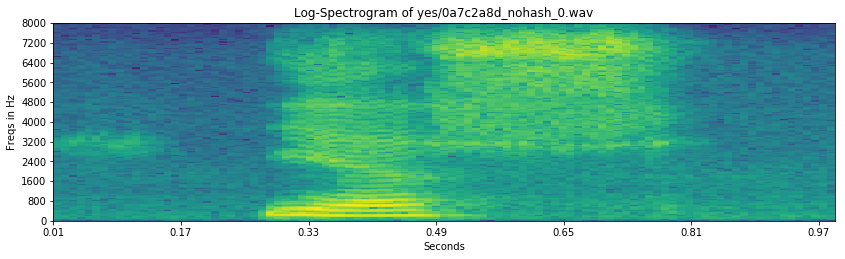

In [9]:
# log-스펙트로그램을 시각화한다
freqs, times, log_spectrogram = log_specgram(samples, sample_rate)
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(211)
ax1.imshow(log_spectrogram.T, aspect='auto', origin='lower',
          extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax1.set_yticks(freqs[::16])
ax1.set_xticks(times[::16])
ax1.set_title('Log-Spectrogram of ' + filename)
ax1.set_ylabel('Freqs in Hz')
ax1.set_xlabel('Seconds')